# PDS: Assignment 3
## For 10 points (not 5 points as usual)

### Deadline: June 1 (until 23:59)


**Instructions:** All answers should be filled in the notebook and then submitted to Moodle. For theoretical question you can use markdown and LaTeX. Name of notebook should be in following format:
 - Name_group_Assignment_3.ipynb (ex. Kobe_Bryant_1929_Assignment_3.ipynb)
 - Try to use fewer cells for compilation (for example, you can use print for several answers, instead of printing each answer on a separate cell)
 - **PLEASE:** submit only one jupyter notebook (no zip or csv files) and with your names as in the instruction. Ohterwise, there will be punishment for 2 points.

## Q1 (30%)
Use Credit.csv dataset. Do the following tasks:
1. Split your dataset to train and test sets (20% for testing) with random state equal to 2021. Imagine that you can use test set only for evaluation at the end.
2. Using any model of your choice, predict Balance. To evaluate performance of the trained model, obtain MSE of training set, 5-fold CV, 10-fold CV, and test set. Present all results together on the same plot with line charts.
3. Instead of using CV, obtain validation set (the size as  with some random split. Train the model on training part, and evaluate performance of the trained model on training, validation and test sets. Present all results together on the same plot with line charts.
4. Now, repeat the step above 5 times with 5 different random splits. You can save results in five different plots. 
5. Comment the results obtained using CV and validation sets.


*Note: You are allowed to use sklearn, but not statsmodels.*

In [3]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Ridge
from sklearn.ensemble import BaggingClassifier, BaggingRegressor, RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import Lasso, LassoCV

### 1st task 

In [26]:
df = pd.read_csv('Credit.csv')

#replacing Yes/No with 1/0
for c in ['Student', 'Married']:
    df.loc[:, c] = df[c].map({'Yes' : 1, 'No' : 0})
    
#taking dummies for Ethnicity and Gender column
dum = pd.get_dummies(df['Ethnicity'])
df = pd.concat([df, dum], axis=1)
df = df.drop('Ethnicity', 1)
dum = pd.get_dummies(df['Gender'])
df = pd.concat([df, dum], axis=1)
df = df.drop('Gender', 1)

#correlation of df's columns
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

# Dropping highly correlated features 
print('The highly correlated columns(above 95% of correlation) will be removed:')
print(to_drop)
df.drop(to_drop, axis=1, inplace=True)

#splitting for train, test sets with 20% of data for testing set
y = df.Balance
X = df.drop('Balance', 1)

#scaling for better performance
ss = StandardScaler()
ss.fit(X)
X = ss.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 2021)

The highly correlated columns(above 95% of correlation) will be removed:
['Rating', 'Female']


,Income,Limit,Cards,Age,Education,Student,Married,Balance,African American,Asian,Caucasian,Male
0,14.891,3606,2,34,11,0,1,333,0,0,1,1
1,106.025,6645,3,82,15,1,1,903,0,1,0,0
2,104.593,7075,4,71,11,0,0,580,0,1,0,1
3,148.924,9504,3,36,11,0,0,964,0,1,0,0
4,55.882,4897,2,68,16,0,1,331,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.096,4100,3,32,13,0,1,560,0,0,1,1
396,13.364,3838,5,65,17,0,0,480,1,0,0,1
397,57.872,4171,5,67,12,0,1,138,0,0,1,0
398,37.728,2525,1,44,13,0,1,0,0,0,1,1


### 2nd task 

In [33]:
cols = df.columns.drop('Balance')
#fitting the model
reg = LinearRegression()
reg.fit(X_train, y_train)

#print(reg.intercept_)
#print(reg.coef_)

zip(cols, reg.coef_)

#predicting
y_pred = reg.predict(X_test)

cv5 = KFold(5)
cv10 = KFold(10)

mse = metrics.mean_squared_error(y_test, y_pred)
print('MSE: ', mse)
print()
print('Training set')
mse5 = cross_val_score(reg, X_train, y_train, scoring = 'neg_root_mean_squared_error', cv = cv5)
print('CV-5: ', mse5)
mse10 = cross_val_score(reg, X_train, y_train, scoring = 'neg_root_mean_squared_error', cv = cv10)
print('CV-10: ', mse10)

print()
print('Testing set')
mse5t = cross_val_score(reg, X_test, y_test, scoring = 'neg_root_mean_squared_error', cv = cv5)
print('CV-5: ', mse5t)
mse10t = cross_val_score(reg, X_test, y_test, scoring = 'neg_root_mean_squared_error', cv = cv10)
print('CV-10: ', mse10t)

MSE:  10911.547641873403

Training set
CV-5:  [ -93.650901   -100.37560399 -101.63856103  -94.92195184 -121.24273991]
CV-10:  [ -89.88983516  -94.52073363  -72.02520185 -122.04681653  -89.32421242
 -109.08022863 -102.28737112  -85.48533043 -111.74507349 -123.22624712]

Testing set
CV-5:  [-104.97472832 -121.90837443 -151.44427707 -115.40651595 -100.80012297]
CV-10:  [ -99.54309848 -108.68772345  -71.51915914 -136.9114894  -103.98865861
 -166.36001901 -115.20484267 -105.36819629  -45.294158   -129.73159092]


Text(0.5, 1.0, '10-Fold CV')

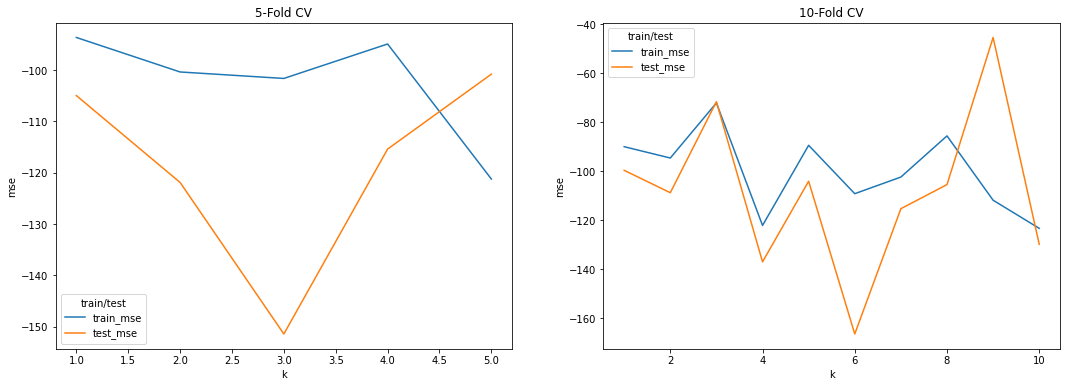

In [43]:
k = [1, 2, 3, 4, 5]
cv5_mse_df = pd.DataFrame({'k':k, 'train_mse':mse5, 'test_mse':mse5t})
cv5_mse_df = cv5_mse_df.melt(id_vars = 'k', var_name = 'train/test', value_name = 'mse')
#train_mse_df

k = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
cv10_mse_df = pd.DataFrame({'k':k, 'train_mse':mse10, 'test_mse':mse10t})
cv10_mse_df = cv10_mse_df.melt(id_vars = 'k', var_name = 'train/test', value_name = 'mse')
#test_mse_df
fig, ax = plt.subplots(1, 2, figsize=(18, 6))
sns.lineplot(ax = ax[0], data = cv5_mse_df, x = 'k', y = 'mse', hue = 'train/test')
ax[0].set_title('5-Fold CV')
sns.lineplot(ax = ax[1], data = cv10_mse_df, x = 'k', y = 'mse', hue = 'train/test')
ax[1].set_title('10-Fold CV')

### 3rd task 

## Q2 (20%)
Use boston.csv dataset. Do the following tasks: 
1. Split your dataset to train and test sets (20% for testing) with random state equal to 2021. Imagine that you can use test set only for evaluation at the end.

2. Use Ridge regression with alpha (penalty term) varying from 0 to some large value of alpha, at which all coefficients take value of 0. Using Cross-Validation select the most optimal value of alpha. 

3. For the selected value of alpha train your model on the training set (80%). And then evaluate on test set (20%). 

4. Show the coefficients of the final model.

*Note: You should use regular Ridge model from sklearn (not RidgeCV) and apply CV on it.*

In [46]:
df = pd.read_csv('boston.csv')

y = df.medv
X = df.drop('medv', 1)

#scaling for better performance
ss = StandardScaler()
ss.fit(X)
X = ss.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 2021)

model = Ridge()
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['alpha'] = np.arange(0, 1, 0.01)
# define and perform the search
search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
res = search.fit(X, y)
# 
print('Best alpha: ', res.best_params_)

Best alpha:  {'alpha': 0.99}


In [47]:
model = Ridge(alpha = 0.99)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print('MSE: ', metrics.mean_squared_error(y_test, y_pred))
print("Coef's: ", model.coef_)

MSE:  23.234888773301833
Coef's:  [-0.9754636   1.2219779  -0.00530929  0.89347506 -2.0659633   2.69887819
  0.30072354 -3.18714021  2.86886032 -1.92283661 -1.90186567  0.86921536
 -4.10420825]


## Q3 (30%)
Use Wage.csv dataset. Do the following tasks:
1. Split your dataset to train and test sets (20% for testing) with random state equal to 2021. Imagine that you can use test set only for evaluation at the end.
2. Perform some data preprocessing.
3. Build Tree model to predict wage value. Set up parameters as you want or use default parameters. Evaluate the performance on test set.
4. Do the same but with Bagging.
5. Do the same but with Random Forest. 
6. Compare their resuts. Which model it is better to use. 
7. Now, for Random Forest model select the parameter that should be tuned and use CV to tune this parameter.
8. After selecting the parameter, run the model again. Show it's performance on test set. 

In [2]:
#Preprocessing...
df = pd.read_csv('Wage.csv')

y = df.wage
#len(df['Unnamed: 0'].unique())
df = df.drop(columns='Unnamed: 0')

df.loc[:, 'health'] = df['health'].map({'1. <=Good':0, '2. >=Very Good':1})
df.loc[:, 'health_ins'] = df['health_ins'].map({'1. Yes':1, '2. No':0})
#taking dummies for cat-l columns:
dummy = pd.get_dummies(df[['education', 'race', 'maritl', 'year', 'sex', 'jobclass', 'region']])
numeric = df[['age', 'logwage', 'health', 'health_ins']]

df = pd.concat([numeric, dummy], axis = 1)

#correlation of df's columns
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

# Dropping highly correlated features 
print('The highly correlated columns(above 95% of correlation) will be removed:')
print(to_drop)
df.drop(to_drop, axis=1, inplace=True)

#splitting for train, test sets with 20% of data for testing set

X = df

#scaling for better performance
ss = StandardScaler()
ss.fit(X)
X = ss.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 2021)

The highly correlated columns(above 95% of correlation) will be removed:
['jobclass_2. Information']


In [3]:
dtree = DecisionTreeRegressor().fit(X_train, y_train)
d_predict = dtree.predict(X_test)
print('Decision Tree Regressor: ')
print('MSE: ', metrics.mean_squared_error(y_test, d_predict))

bdt = BaggingRegressor(DecisionTreeRegressor()).fit(X_train, y_train)
bdt_predict = bdt.predict(X_test)
print('Bagging Regressor: ')
print('MSE: ', metrics.mean_squared_error(y_test, bdt_predict))

rf = RandomForestRegressor().fit(X_train, y_train)
rf_predict = rf.predict(X_test)
print('Random Forest Regressor: ')
print('MSE: ', metrics.mean_squared_error(y_test, rf_predict))

Decision Tree Regressor: 
MSE:  0.28353577091134563
Bagging Regressor: 
MSE:  0.27031872416913594
Random Forest Regressor: 
MSE:  0.2644931222253798


Random Forest has least MSE, so it is better to use this model

In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, 
                               n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train, y_train)

param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                           cv = 3, n_jobs = -1, verbose = 2)

grid_search.fit(X_train, y_train)
params = grid_search.best_params_

print(params)

#rf = RandomForestRegressor(params)
#rf.fit(X_train, y_train)
#y_pred = rf.predict(X_test)
#print('Random Forest Regressor: ')
#print('MSE: ', metrics.mean_squared_error(y_test, y_pred))

Fitting 3 folds for each of 100 candidates, totalling 300 fits


## Q4 (20%)
Again use boston.csv dataset. Do the following tasks: 
1. Split your dataset to train and test sets (20% for testing) with random state equal to 2021. Imagine that you can use test set only for evaluation at the end.

2. Use Lasso regression with alpha (penalty term) varying from 0 to some large value of alpha, at which all coefficients take value of 0. Using Cross-Validation select the most optimal value of alpha. 

3. For the selected value of alpha train your model on the training set (80%). And then evaluate on test set (20%). 

4. Show the coefficients of the final model.

5. Compare your results (i.e. test MSE) and coefficients with the Ridge Model.

*Note: In this case you should use LassoCV (not Lasso and apply CV separately).*

In [7]:
df = pd.read_csv('boston.csv')

y = df.medv
X = df.drop('medv', 1)

#scaling for better performance
ss = StandardScaler()
ss.fit(X)
X = ss.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 2021)

lasso = Lasso()
lassocv = LassoCV(cv = 10)
lassocv.fit(X_train, y_train)

lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train, y_train)
print('Alpha is: ', lassocv.alpha_)
print('MSE: ', metrics.mean_squared_error(y_test, lasso.predict(X_test)))

Alpha is:  0.007128860571565509
MSE:  23.207999191566017


With Ridge, MSE was 23.235, with Lasso, it is 23.208. So Lasso has better performance.